In [40]:
#@title 라이브러리 호출

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#@title 데이터 불러오기

file_url = 'C:/Users/rx178/Desktop/ML_과제/data.csv'
df = pd.read_csv(file_url)
df = pd.DataFrame(df)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Total_Stops,Price,Duration_total,Dep_hour,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday,Add_col_1,Add_col_2,Add_col_3,Air_col_1,Air_col_2,Air_col_3,Air_col_4,Air_col_5,Air_col_6
0,0,3897,170,22,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,2,7662,445,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,13882,1140,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,6218,325,18,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,285,16,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [42]:
df.describe()

,Total_Stops,Price,Duration_total,Dep_hour,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday,Add_col_1,Add_col_2,Add_col_3,Air_col_1,Air_col_2,Air_col_3,Air_col_4,Air_col_5,Air_col_6
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824097,9086.292735,643.152968,12.490358,0.139487,0.112619,0.099420,0.214379,0.115709,0.149691,0.185546,0.029957,0.003370,0.192192,0.163921,0.111964,0.076577,0.044842,0.029863
std,0.675135,4610.885695,507.848241,5.748819,0.346470,0.316142,0.299239,0.410410,0.319890,0.356785,0.388758,0.170477,0.057958,0.394042,0.370221,0.315337,0.265932,0.206966,0.170218
min,0.000000,1759.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,170.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,520.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,930.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,2860.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


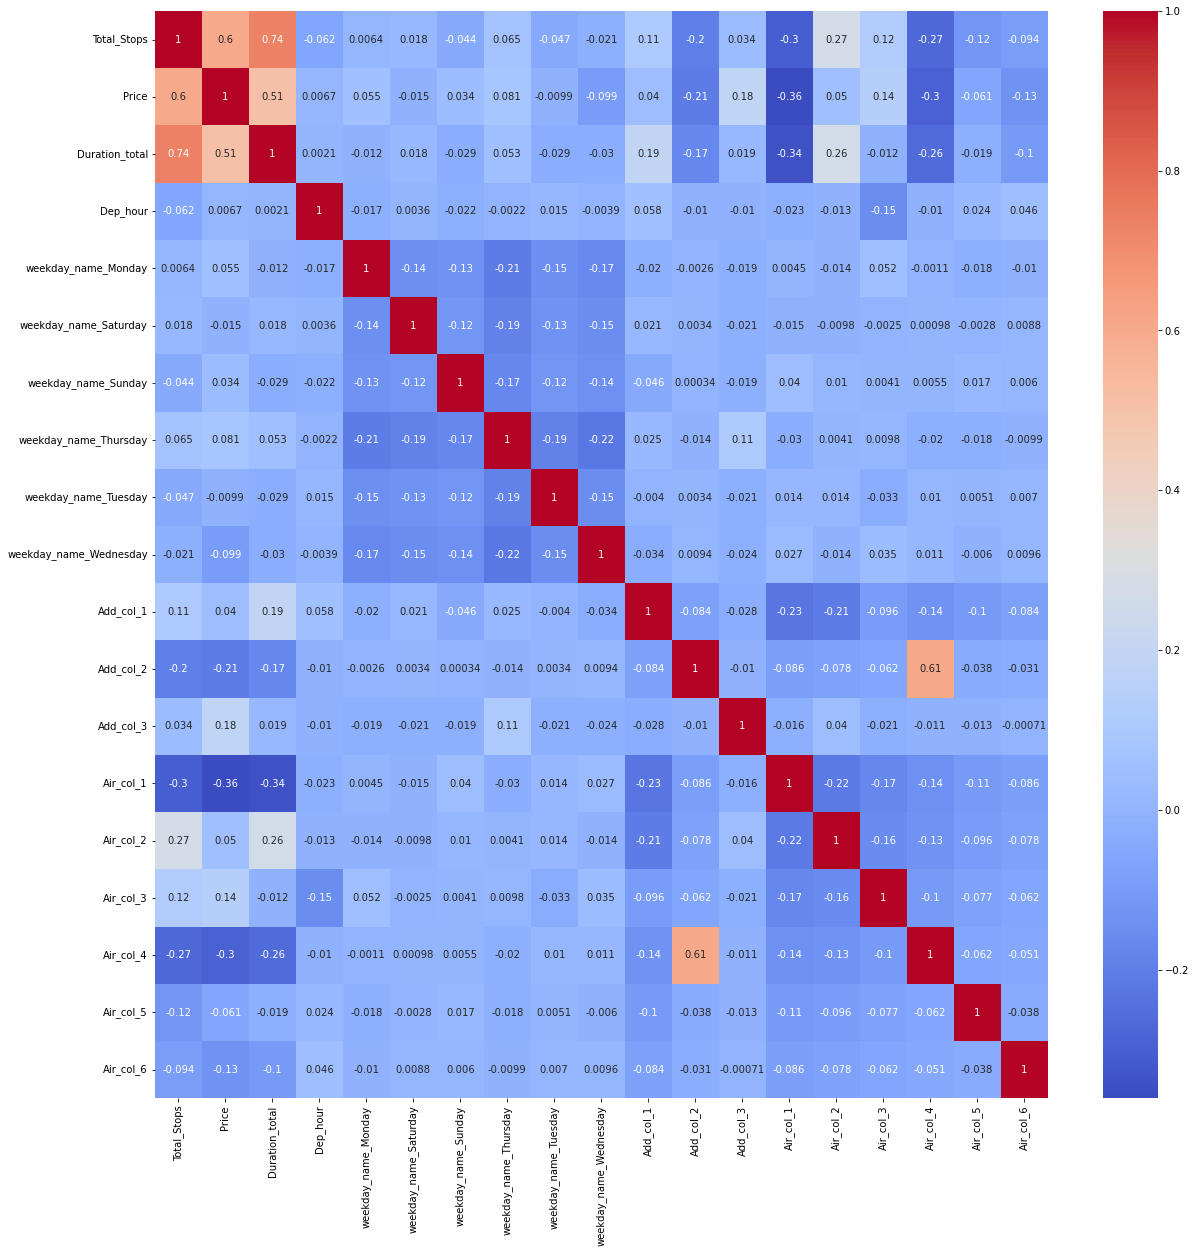

In [43]:
#@title 데이터 상관관계 heatmap

ax = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(ax, annot = True, cmap = 'coolwarm')
plt.show()

In [44]:
#@title 학습/시험 데이터 분할
from sklearn.model_selection import train_test_split

# Price -> y값 정답

X = df.drop('Price', axis = 1)
y = df.Price
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 100                                                        
                                                    )

In [45]:
#@title 모델링
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators = 1000, max_depth = 5, random_state = 28)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_relation_square = model.score(X_train, y_train)
test_relation_square = model.score(X_test, y_test)
print(f'train 결정계수 : {train_relation_square} / test 결정계수 : {test_relation_square}')

train 결정계수 : 0.9237537044210506 / test 결정계수 : 0.6825271809702658


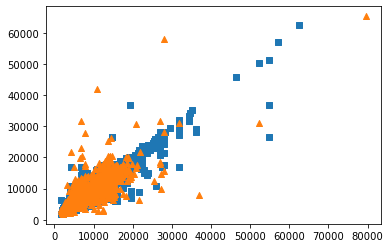

In [46]:
#@title 최적 파라미터 적용 전 scatter plot

# 모델훈련상태 비교
plt.scatter(y_train, train_pred, marker = 's')
plt.scatter(y_test, test_pred, marker = '^')
plt.show()

In [47]:
#@title 최적 파라미터 적용 전 RMSE

# 분류 -> accuracy / 수치예측(MAE, MSE, RMSE)
from sklearn.metrics import mean_squared_error
print(
      # 실제 값, 예측 값 간 에러 비교
      'train_rmse : ', mean_squared_error(y_train, train_pred, squared = False),
      'test_rmse : ', mean_squared_error(y_test, test_pred, squared = False)
     )

train_rmse :  1270.1899305605516 test_rmse :  2619.1334375297497


In [48]:
#@title 실제 값 & 예측 값 
comparison = pd.DataFrame({'actual' : y_test, 'pred' : test_pred})
comparison

,actual,pred
8160,10703,10782.906250
6423,13587,10035.405273
3102,12819,15316.389648
5797,8610,8308.571289
7179,14714,14503.311523
...,...,...
3410,12121,13286.122070
10462,2470,4081.287109
1963,12898,12608.407227
5985,11087,11969.630859


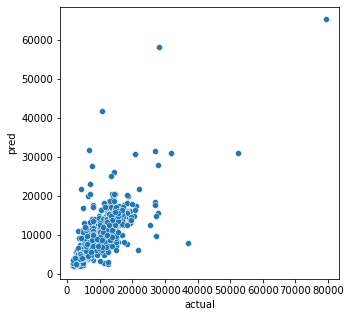

In [49]:
#@title 실제 값 & 예측 값 시각화
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'actual', y = 'pred', data = comparison)
plt.show()

In [50]:
#@title MAE
from sklearn.metrics import mean_absolute_error
print('test_rmse : ', mean_absolute_error(y_test, test_pred))

test_rmse :  1371.23884618935


In [51]:
#@title K-Fold 교차 검증
from sklearn.model_selection import KFold

In [52]:
kf = KFold(n_splits = 10)

In [53]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [59]:
train_rmse_total = list()
test_rmse_total = list()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = xgb.XGBRegressor(n_estimators = 1000, 
                             max_depth = 5, 
                             random_state = 28)
    model.fit(X_train, y_train) # 학습
    train_pred = model.predict(X_train) # 훈련셋 예측(잘 학습되었는가, 오버피팅은 문제없는가?)
    test_pred = model.predict(X_test) # 시험셋 예측 (잘 적중하는가, 언더피팅 문제는 없는가?)

    train_rmse = mean_squared_error(y_train, train_pred, squared = False)
    test_rmse = mean_squared_error(y_test, test_pred, squared = False)
    train_rmse_total.append(train_rmse)
    test_rmse_total.append(test_rmse)

In [60]:
#@title 최적의 파라미터 적용 교차 검증
print(
    # 실제 값 , 예측 값 간 에러 비교
    'train_rmse : ', np.mean(train_rmse_total),
    'test_rmse : ', np.mean(test_rmse_total)
        )

train_rmse :  1303.7460823618917 test_rmse :  2654.185010859511


In [61]:
#@title 하이퍼 파라미터 튜닝
train_rmse_total = list()
test_rmse_total = list()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = xgb.XGBRegressor(n_estimators = 1000, 
                             max_depth = 5, 
                             random_state = 28)
    model.fit(X_train, y_train) # 학습
    train_pred = model.predict(X_train) # 훈련셋 예측(잘 학습되었는가, 오버피팅은 문제없는가?)
    test_pred = model.predict(X_test) # 시험셋 예측 (잘 적중하는가, 언더피팅 문제는 없는가?)

    train_rmse = mean_squared_error(y_train, train_pred, squared = False)
    test_rmse = mean_squared_error(y_test, test_pred, squared = False)
    train_rmse_total.append(train_rmse)
    test_rmse_total.append(test_rmse)


### 하이퍼파라미터 튜닝

* n_estimators (기본값 100) : 랜덤 포레스트를 구성하는 결정트리 개수
  - 너무 많거나 적으면 성능과 예측력에 영향

* max_depth (결정 트리 유사) : max_depth 커지면 -> 오버피팅 / 작으면 -> 언더피팅
* min_samples_split : 이 숫자보다 작으면 더이상 나누지 않음
* min_samples_leaf : (최종적으로 나눠질) 최소 몇 개의 데이터가 노드에 속하게 할 것인지
* n_jobs : 병렬 처리 시 사용할 CPU 코어 수

In [62]:
from sklearn.model_selection import RandomizedSearchCV

parameter = {
             'learning_rate': [0.01, 0.1, 0.3], # 경사하강법 : '매개변수' -> 최소오차 -> 보폭 크기
             'max_depth': [5, 10, 15, 20], # 트리의 깊이 (오버피팅)
             'subsample': [0.3, 0.5, 0.7, 1], # 추출할 데이터 비율
             'n_estimators': [500, 800, 1000, 2000] # 트리 개수
            }

In [63]:
from sklearn.pipeline import Pipeline
model2 = xgb.XGBRegressor(random_state = 100)
rs = RandomizedSearchCV(model2, 
                        parameter, 
                        scoring = 'neg_mean_squared_error',
                        random_state = 100,
                        n_jobs = -1)

In [64]:
import time
start = time.time()
rs.fit(X_train, y_train)
print(time.time() - start)

191.04224276542664


In [65]:
rs.best_params_
# {'subsample': 1, 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.01}

{'subsample': 1, 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.01}

In [66]:
# 최적파라미터로 리모델링

import xgboost as xgb
model = xgb.XGBRegressor(subsample = 1, n_estimators = 2000, max_depth = 5, random_state = 100, learning_rate = 0.01)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_relation_square = model.score(X_train, y_train)
test_relation_square = model.score(X_test, y_test)
print(f'train 결정계수 : {train_relation_square} / test 결정계수 : {test_relation_square}')


train 결정계수 : 0.7769648485299081 / test 결정계수 : 0.5910965921974717


In [69]:
# 최적 파라미터 적용 RMSE
from sklearn.metrics import mean_squared_error
print('train_rmse : ', mean_squared_error(y_train, train_pred, squared = False),
      'test_rmse : ', mean_squared_error(y_test, test_pred, squared = False))

train_rmse :  2167.1041404507178 test_rmse :  3071.684414609305


In [70]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [71]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=True)
fig.add_trace(go.Scatter(x=y_train,y=y_test, mode='markers',name='Train'))
fig.add_trace(go.Scatter(x=y_test,y=test_pred,mode='markers',
              name='Test')) # mode='lines+markers'          

fig.update_layout(title='<b>actual과 predict 비교')
fig.show()

In [72]:
import joblib

joblib.dump(model, 'XGBoost.pkl')

['XGBoost.pkl']

In [73]:
xgb_mm = joblib.load('XGBoost.pkl')
xgb_mm

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=100,
             reg_alpha=0, reg_lambda=1, ...)

In [74]:
# 호출한 피클파일로 모델일

xgb_mm.fit(X_train, y_train)
train_pred = xgb_mm.predict(X_train)
train_pred = xgb_mm.predict(X_test)

train_relation_square = xgb_mm.score(X_train, y_train)
test_relation_square = xgb_mm.score(X_test, y_test)
print(f' train 결정계수 : {train_relation_square}, test 결정계수 : {test_relation_square}')

 train 결정계수 : 0.7769648485299081, test 결정계수 : 0.5910965921974717
